# Heart Failure Prediction

# Introduction

Heart failure is a significant public health concern, affecting millions of people globally. Early detection and accurate prediction of heart failure can be critical in preventing the development of the condition or reducing its impact. In recent years, the use of machine learning techniques, particularly supervised learning models, has shown great promise in accurately predicting heart failure risk.

This pipeline will focus on the application of three supervised learning models, namely ***Support Vector Machine (SVM), Decision Tree Classifier, and K Nearest Neighbors***, in predicting heart failure. These models have been widely used in various medical applications and have shown good performance in predicting heart failure risk.

The pipeline will discuss the theoretical foundation of each model and how they can be applied to predict heart failure. It will also compare their performance in terms of ***Accuracy, F1 Score***, and other relevant metrics. Additionally, the essay will discuss the potential benefits and limitations of using these models in heart failure prediction, as well as their practical applications in clinical settings.

Overall, this essay aims to provide a comprehensive overview of heart failure prediction using supervised learning models, highlighting their potential for improving patient outcomes and enhancing the efficiency of healthcare delivery.

# The Dataset

The Dataset can be found on Kaggle and contains 12 Feature Columns, defined below,

1 - **<u>Age</u>**: Age of the Patient

2 - **<u>Sex</u>**: Gender of the Patient (***M: Male, F: Female***)

3 - **<u>ChestPainType</u>**: Types of Chest Pain (***TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic***)

4 - **<u>RestingBP</u>**: Resting Blood Pressure (***mm Hg***)

5 - **<u>Cholesterol</u>**: Cholesterol Levels (***mm/dl***)

6 - **<u>FastingBS</u>**: Blood Sugar Levels while Fasting (***1: if FastingBS > 120 mg/dl, 0: otherwise***)

7 - **<u>RestingECG</u>**: Resting Eectrocardiogram Results (***Normal: Normal, ST: having ST-T wave abnormality (T wave  inversions and/or ST elevation or  depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by  Estes' criteria***)

8 - **<u>MaxHR</u>**: Maximum Heart Rate (***Numeric value between 60 and 202***)

9 - **<u>ExerciseAngina</u>**: Exercise-Induced Angina (***Y: Yes, N: No***)

10 - **<u>Oldpeak</u>**: Oldpeak = ST (***Numeric value measured in depression***)

11 - **<u>ST_Slope</u>**: Slope of the Peak Exercise ST Segment (***Up: upsloping, Flat: flat, Down: downsloping***)

12 - **<u>HeartDisease</u>**: Output Class (***1: heart disease, 0: Normal***)

In addition this dataset also contains 918 unique entries of different patients, which is ample data to train and test the Machine Learning Models.

# Importing Libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.decomposition   import PCA
from imblearn.over_sampling  import SMOTE
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

import seaborn               as sns
import matplotlib.pyplot     as plt

# Importing Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Cleaning & Exploration

Data Cleaning is the one the most cruicial steps of a Machine Learning Pipeline. Most of the times the data is either incomplete or has alot of duplicate values, this can adversely effect the performance of the Machine Learning Models, and the model will not be trainined accuratly. Therefore, we will start this pipeline with cleaning the daatset.

## Data Cleaning

##### Looking for Null Values

In [3]:
print('Null value count per feature:\n', df.isna().sum())

Null value count per feature:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
print('Number of Duplicate Values in the Dataset:', df.duplicated().sum())

Number of Duplicate Values in the Dataset: 0


No missing & duplicate values found in the dataset, which is a good sign as the dataset is complete and the model has more unique input values to learn. 

##### Data types of features

Another important step in the data cleaning stage of any machine learning pipeline is to define the variable types af the dataset, as we know that a machine learning model only takes **int & float** values as input, so we need to make sure how many **int & float** types of variables we have in the dataset and how many other types, that we will have to convert to int. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see from the results above that 7 out of 12 features have **int and float** types, which is good we can work with that but at the same time 5 out of 12 are **objects** which means they are string type of variable, we will convert these into ints in the further steps of this pipeline.

##### Checking for Class Imbalance

Checking for class imbalance, to decide whether we need to perform sampling of the dataset.

<AxesSubplot:>

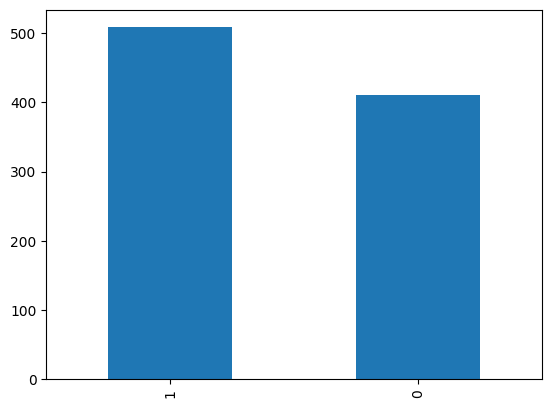

In [6]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

Form the table above, it is clear that the classes are imbalanced and need to balanced. Class balancing and Sampling of the dataset will be conducted in the feature engineering step of this pipeline.

##### Checking if data is scaled

As discussed in the introduction, this pipeline will perform classification using spatial models, which measure the distance between the data points and classifiy them in to groups. Therefore it is important to scale the dataset, so that all the features are scaled to a standard and make it easy for the model to learn the data points. 

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the results above it clear that the data points are not standardized.

##### Spliting the Data in to Train and Test Sub-Datasets

Dataset is split into Training and Testing sub-datasets so that the data is not leaked in while training the models wich can cause problems such as, Over fitting and reduce the accuracy of the model.

In [8]:
df_train, df_test = train_test_split(df)
print(df_train.shape, df_test.shape)

(688, 12) (230, 12)


## Data Exploration

##### Relation Between Age & Heart Diseases

<AxesSubplot:xlabel='Age', ylabel='count'>

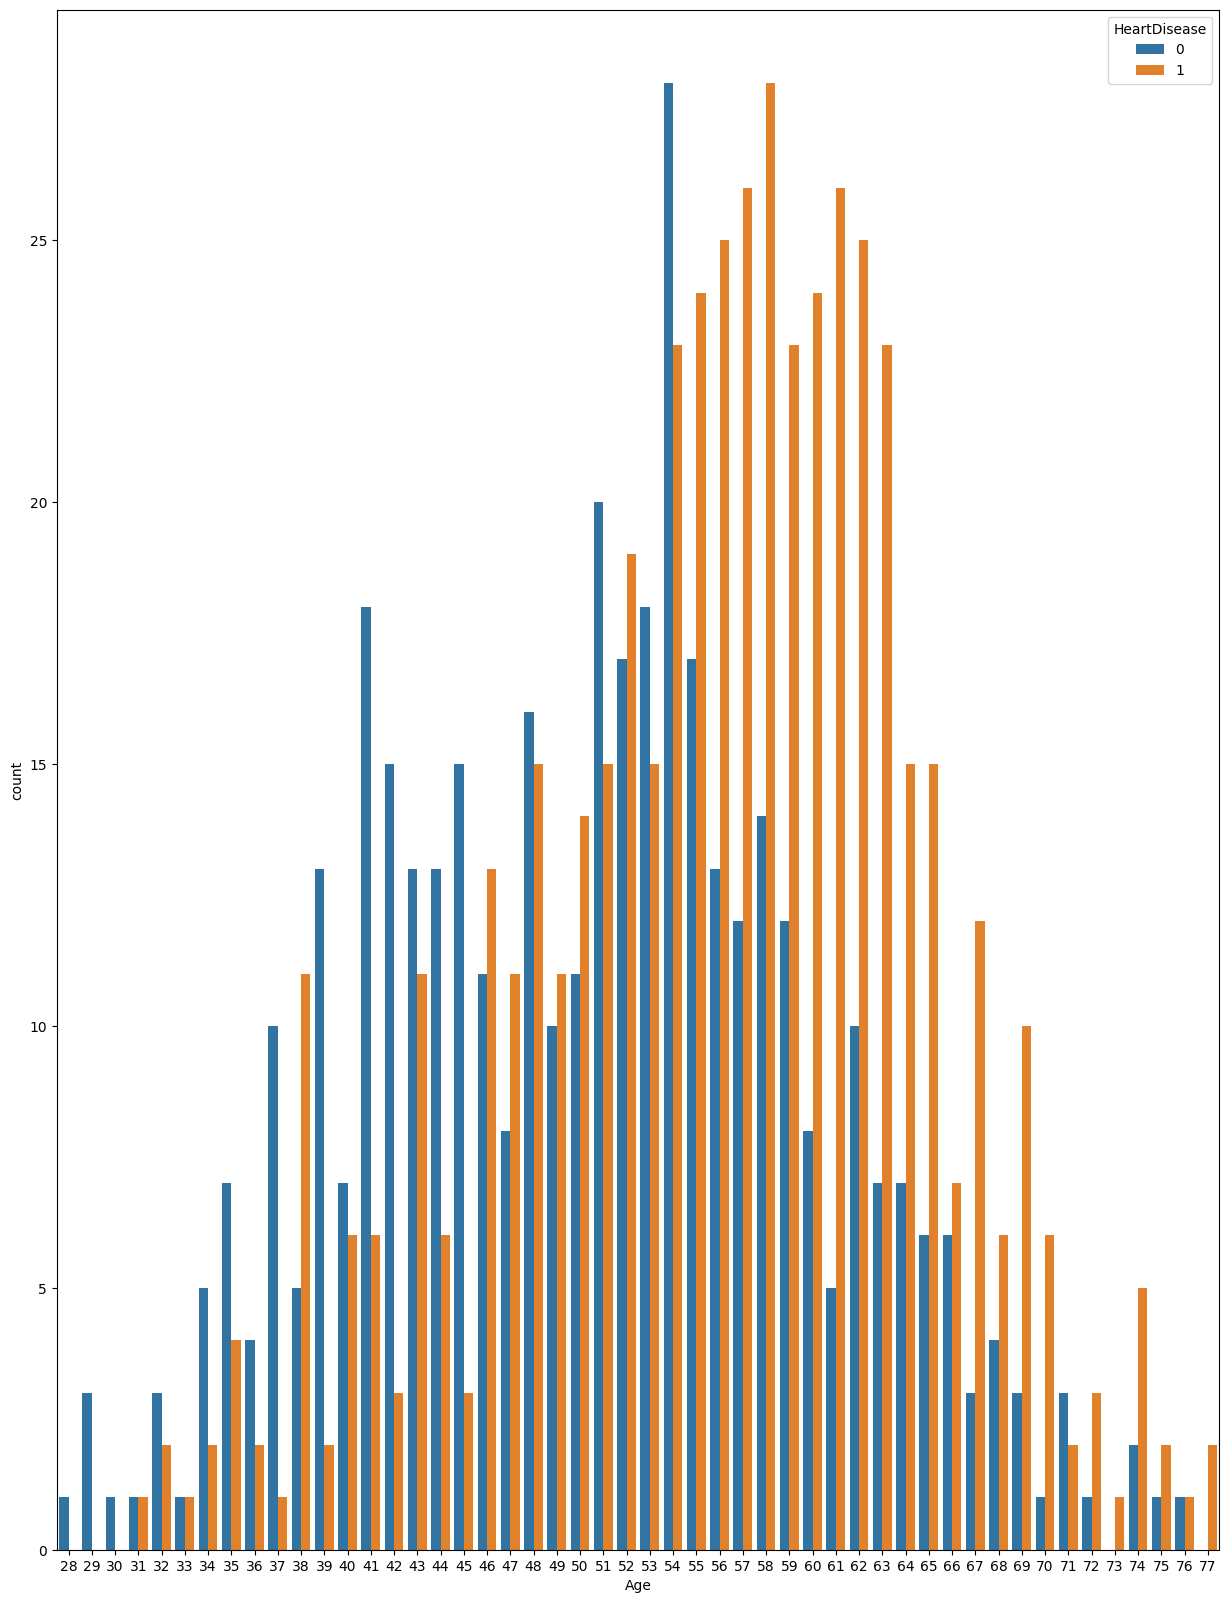

In [9]:
plt.subplots(figsize=(15,20))
sns.countplot(x="Age", hue = 'HeartDisease', data=df)

##### Heart Issue incidence relative to Sex of patients 

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

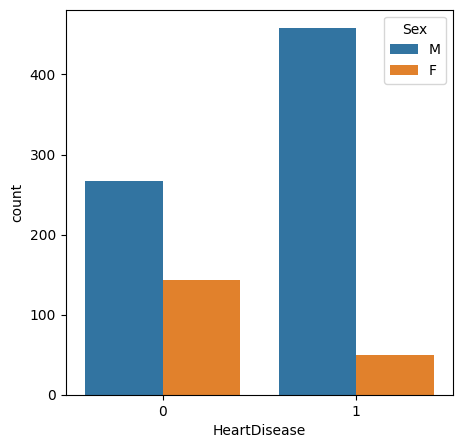

In [10]:
plt.subplots(figsize=(5,5))
sns.countplot(x="HeartDisease", hue = 'Sex', data=df)

##### Chest Pain Types displayed in a Pie Chart

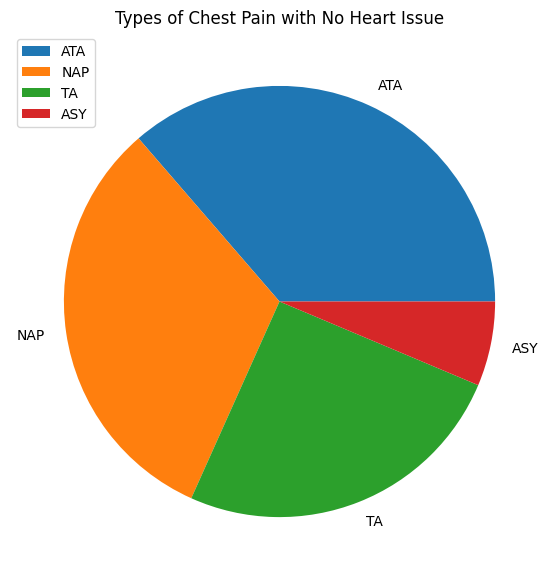

In [11]:
df_0 = df[df['HeartDisease'] == 0]

plt.figure(figsize=(7,7))
plt.title('Types of Chest Pain with No Heart Issue')

data = df_0['ChestPainType'].value_counts()
lab = df_0['ChestPainType'].unique()
plt.pie(data, labels = lab )

plt.legend()
plt.show()

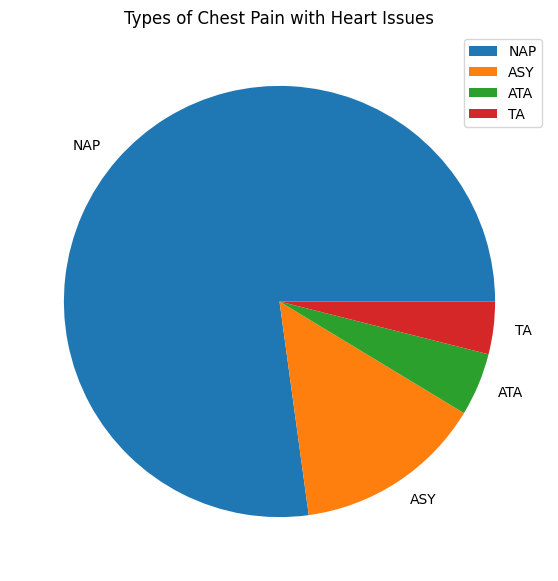

In [12]:
df_1 = df[df['HeartDisease'] == 1]

plt.figure(figsize=(7,7))
plt.title('Types of Chest Pain with Heart Issues')

data = df_1['ChestPainType'].value_counts()
lab = df_1['ChestPainType'].unique()
plt.pie(data, labels = lab )

plt.legend()
plt.show()

##### Heatmap to visulaize the relation between all the features

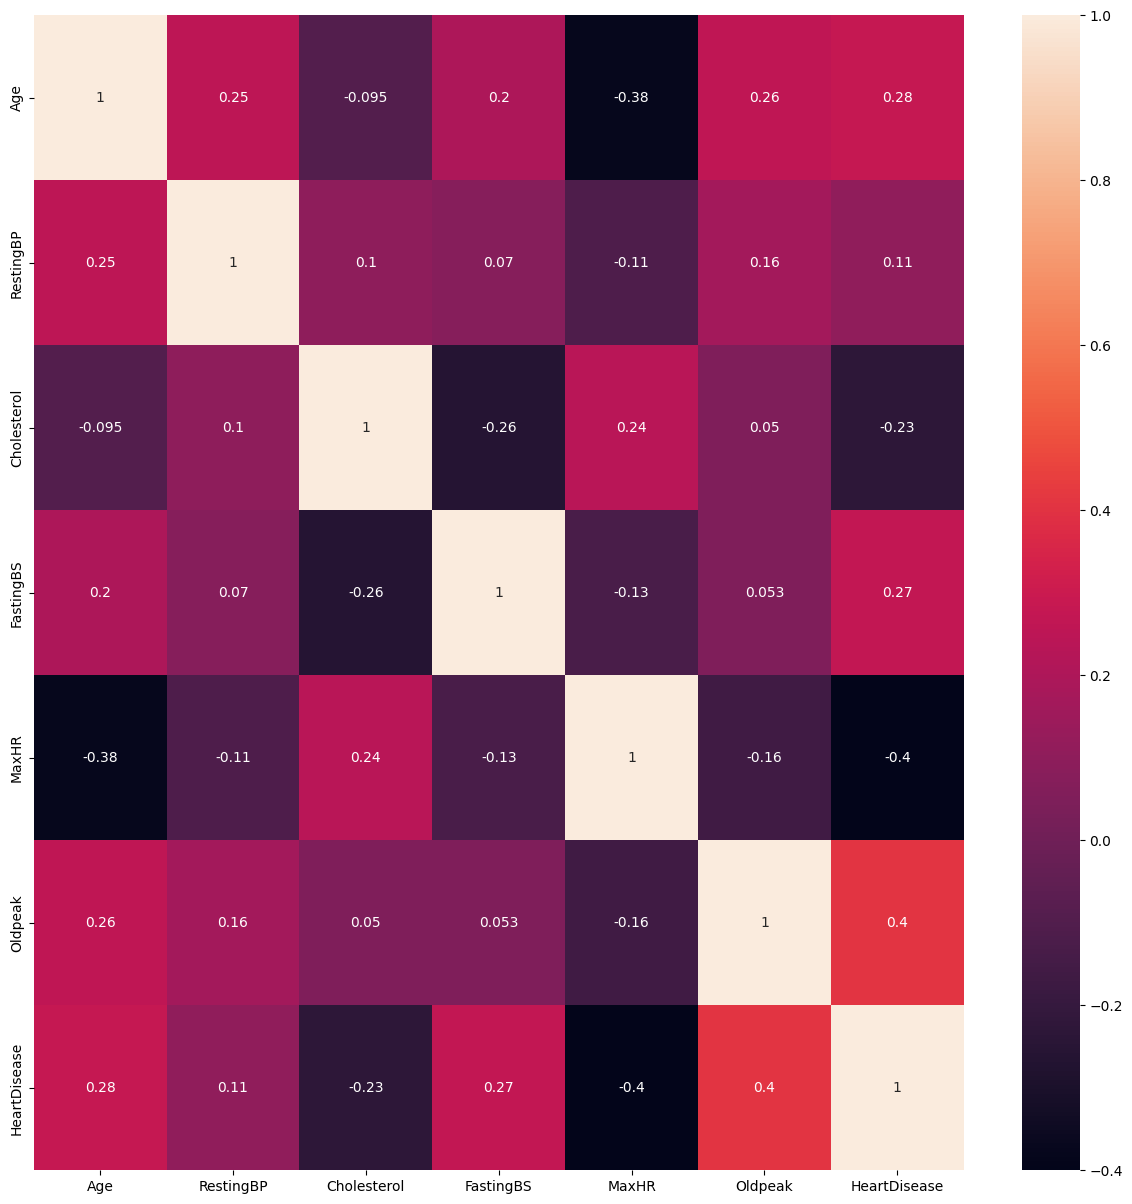

In [13]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True);

# Feature Engineering

Now that all the data is cleaned, and split in to sub-datasets, we can move onto the next phase of this ML Pipeline, Feature Enginerring.

## Seperating Features and Target Variables

Further dividing the **Test & Train** sub-datasets into **X & Y** axis,

In [14]:
x_train = df_train.drop(['HeartDisease'], axis = 1)
y_train = df_train['HeartDisease']

x_test = df_test.drop(['HeartDisease'], axis = 1)
y_test = df_test['HeartDisease']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(688, 11) (688,) (230, 11) (230,)


## Categorical Encoding 

As discussed earlier, this step is done to convert the **Object** type of data in to numerical values so that it is interpretable by the Machine,

In [15]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(x_train)
x_train = enc.transform(x_train)
x_test = enc.transform(x_test)
print('x_test:', x_test.shape)
print('x_train:', x_train.shape)

x_test: (230, 495)
x_train: (688, 495)


## Scaling the Dataset

Scaling the dataset to a standard, so that all the data points can plotted in the same rang, making it easier for the Machine Learning models to plot them and make predictions,

In [16]:
scale = StandardScaler(with_mean = False)
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)


x_train: (688, 495)
x_test: (230, 495)


## Balancing the Dataset

One thing to notice in the previous step is that after categorical encoding the number of features increased exponentially, from 11 to 488, thats a lot of new datapoints for the model, and going though them all will require alot of power, so we will reduce these features to 100, so that it is easier fro the machine to learn.

In [17]:
dr = PCA(n_components = 100)
dr.fit(x_train.toarray())
x_train = dr.transform(x_train.toarray())
x_test = dr.transform(x_test.toarray())
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

x_train: (688, 100)
x_test: (230, 100)


## Balancing the Classes

As discussed earlier in the pipeline, the target variable class was imbalanced. With Positve Heart Diseases being 100 times more then Negative Heart Disease. Therefore, it is important we resample the data to balance the classes. If the dataset is left unbalanced, the model will not be trained properly and end up overfitting.

In [18]:
sample = SMOTE()
x_train, y_train = sample.fit_resample(x_train, y_train)
print(x_train.shape, y_train.shape)

(750, 100) (750,)


# Training ML Models & Finding Best Hyperparameters

Moving onto the Training and tuning the hyperparameters of the 3 Classififcation models we will be working on, namely, ***Decision Tree Classifier, Support Vector Machines, K Nearest Neighbors***.

## Defining the Models


Starting by defining all the models and a dictionary of thier hyperparameters, the dictionary of hyperparameters will be discussed in the next step of this pipeline.

### Decision Tree Classifier

In [19]:
dtc = DecisionTreeClassifier()
params_dtc = {
'criterion': ['gini', 'entropy'],
'splitter': ['best', 'random'],
'max_depth': [10, 100, 1000, 2000, 5000, 10000, 20000]
}


### Support Vector Machines

In [20]:
svm = SVC() 
params_svc = {
'C': [1, 10, 100],
'kernel': ['linear', 'rbf']
}

### K Nearest Neighbours

In [21]:
KNN = KNeighborsClassifier()
params_KNN= {
'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
'weights': ['uniform', 'distance'],
'metric': ['manhattan', 'euclidean', 'minkowski']
}


# Applying Grid Search and Training the Models

***GridSearchCV*** is a method used to fine tune the model using the dictionary of hyperparameters and finding out which combination of hyperparameters works best for our dataset,

## Decision Tree Classifier

In [22]:
grid_tree = GridSearchCV(dtc, param_grid = params_dtc, cv = 5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000, 2000, 5000, 10000, 20000],
                         'splitter': ['best', 'random']})

In [23]:
dtc_df = pd.DataFrame(grid_tree.cv_results_)
print('\033[1m Cross Valitdation results for Decision Tree Classifier: \033[0m')
dtc_df

 Cross Valitdation results for Decision Tree Classifier: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064333,0.021367,0.002000,0.001669,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.780000,0.800000,0.760000,0.760000,0.846667,0.789333,0.032277,14
1,0.005776,0.000405,0.000200,0.000399,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.773333,0.813333,0.780000,0.733333,0.833333,0.786667,0.034512,15
2,0.059643,0.017105,0.000398,0.000487,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.740000,0.773333,0.746667,0.780000,0.820000,0.772000,0.028410,26
3,0.007007,0.000941,0.000990,0.000631,gini,100,random,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.786667,0.773333,0.813333,0.780000,0.806667,0.792000,0.015434,12
4,0.056738,0.007760,0.000797,0.000398,gini,1000,best,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",0.793333,0.780000,0.740000,0.780000,0.853333,0.789333,0.036661,13
5,0.009039,0.001952,0.001197,0.000977,gini,1000,random,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",0.760000,0.786667,0.806667,0.726667,0.800000,0.776000,0.029394,24
6,0.050002,0.015892,0.001208,0.000413,gini,2000,best,"{'criterion': 'gini', 'max_depth': 2000, 'spli...",0.760000,0.773333,0.740000,0.786667,0.853333,0.782667,0.038552,18
7,0.006180,0.001480,0.000399,0.000489,gini,2000,random,"{'criterion': 'gini', 'max_depth': 2000, 'spli...",0.746667,0.806667,0.800000,0.740000,0.880000,0.794667,0.050491,9
8,0.061831,0.018290,0.000801,0.000401,gini,5000,best,"{'criterion': 'gini', 'max_depth': 5000, 'spli...",0.780000,0.773333,0.746667,0.780000,0.820000,0.780000,0.023476,21
9,0.005202,0.000385,0.000399,0.000489,gini,5000,random,"{'criterion': 'gini', 'max_depth': 5000, 'spli...",0.753333,0.766667,0.800000,0.793333,0.800000,0.782667,0.019137,17


## Support Vector Machines

In [24]:
grid_svm = GridSearchCV(svm, param_grid = params_svc, cv =5)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ['linear', 'rbf']})

In [25]:
svm_df = pd.DataFrame(grid_svm.cv_results_)
print('\033[1m Cross Valitdation results for Support Vector Machine: \033[0m')
svm_df

 Cross Valitdation results for Support Vector Machine: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.414201,0.086911,0.003217,0.002952,1,linear,"{'C': 1, 'kernel': 'linear'}",0.813333,0.780000,0.820000,0.780000,0.880000,0.814667,0.036612,4
1,0.022554,0.003756,0.011451,0.002025,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.826667,0.826667,0.840000,0.800000,0.933333,0.845333,0.045879,1
2,5.175674,1.482218,0.001610,0.000488,10,linear,"{'C': 10, 'kernel': 'linear'}",0.793333,0.793333,0.813333,0.760000,0.880000,0.808000,0.039866,5
3,0.025398,0.001058,0.010244,0.003021,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.820000,0.840000,0.793333,0.813333,0.873333,0.828000,0.027129,3
4,41.658924,12.420401,0.002391,0.000799,100,linear,"{'C': 100, 'kernel': 'linear'}",0.793333,0.793333,0.813333,0.766667,0.873333,0.808000,0.035876,5
5,0.052183,0.018208,0.016121,0.004513,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.820000,0.840000,0.793333,0.813333,0.880000,0.829333,0.029394,2


## K Nearest Neighbors

In [26]:
grid_knn = GridSearchCV(KNN, param_grid = params_KNN, cv = 5)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']})

In [27]:
knn_df = pd.DataFrame(grid_tree.cv_results_)
print('\033[1m Cross Valitdation results for K Nearest Neighbors: \033[0m')
knn_df

 Cross Valitdation results for K Nearest Neighbors: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064333,0.021367,0.002000,0.001669,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.780000,0.800000,0.760000,0.760000,0.846667,0.789333,0.032277,14
1,0.005776,0.000405,0.000200,0.000399,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.773333,0.813333,0.780000,0.733333,0.833333,0.786667,0.034512,15
2,0.059643,0.017105,0.000398,0.000487,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.740000,0.773333,0.746667,0.780000,0.820000,0.772000,0.028410,26
3,0.007007,0.000941,0.000990,0.000631,gini,100,random,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.786667,0.773333,0.813333,0.780000,0.806667,0.792000,0.015434,12
4,0.056738,0.007760,0.000797,0.000398,gini,1000,best,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",0.793333,0.780000,0.740000,0.780000,0.853333,0.789333,0.036661,13
5,0.009039,0.001952,0.001197,0.000977,gini,1000,random,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",0.760000,0.786667,0.806667,0.726667,0.800000,0.776000,0.029394,24
6,0.050002,0.015892,0.001208,0.000413,gini,2000,best,"{'criterion': 'gini', 'max_depth': 2000, 'spli...",0.760000,0.773333,0.740000,0.786667,0.853333,0.782667,0.038552,18
7,0.006180,0.001480,0.000399,0.000489,gini,2000,random,"{'criterion': 'gini', 'max_depth': 2000, 'spli...",0.746667,0.806667,0.800000,0.740000,0.880000,0.794667,0.050491,9
8,0.061831,0.018290,0.000801,0.000401,gini,5000,best,"{'criterion': 'gini', 'max_depth': 5000, 'spli...",0.780000,0.773333,0.746667,0.780000,0.820000,0.780000,0.023476,21
9,0.005202,0.000385,0.000399,0.000489,gini,5000,random,"{'criterion': 'gini', 'max_depth': 5000, 'spli...",0.753333,0.766667,0.800000,0.793333,0.800000,0.782667,0.019137,17


# Grid Search Best Hyperparameters

Once all the Models are fine-tuned, lets take a look at the best scores and hyperparameters of all the models,

In [28]:
print("\n The best score & hyperparameters for \033[1m K Nearest Neighbors \033[0m:\n",grid_knn.best_score_, grid_knn.best_params_ )
print("\n The best score & hyperparameters for \033[1m Support Vector Machines \033[0m:\n",grid_svm.best_score_, grid_svm.best_params_)
print("\n The best score & hyperparameters for \033[1m Decision Tree Classifier \033[0m:\n",grid_tree.best_score_, grid_tree.best_params_)



 The best score & hyperparameters for  K Nearest Neighbors :
 0.8346666666666666 {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

 The best score & hyperparameters for  Support Vector Machines :
 0.8453333333333333 {'C': 1, 'kernel': 'rbf'}

 The best score & hyperparameters for  Decision Tree Classifier :
 0.8146666666666667 {'criterion': 'entropy', 'max_depth': 2000, 'splitter': 'best'}


# Testing the Models

Now that we know the besthyperparameters, we will train the model on those hyperparameters and then test the model.

## Support Vector Machines

In [29]:
y_predsvm = grid_svm.best_estimator_.predict(x_test)
f1_svm =  f1_score(y_test, y_predsvm)
accu_svm = accuracy_score(y_test, y_predsvm)
prec_svm = precision_score(y_test, y_predsvm)
rec_svm = recall_score(y_test, y_predsvm)
s_svm = pd.Series({'Model': 'Support Vector Machines ', 
               'F1 Score': f1_svm, 
               'Accuracy': accu_svm,
               'Precision': prec_svm,
               'Recall' : rec_svm})
s_svm = pd.DataFrame(s_svm)
print(s_svm)

                                  0
Model      Support Vector Machines 
F1 Score                   0.860465
Accuracy                   0.843478
Precision                     0.888
Recall                     0.834586


## Decision Tree Classifier

In [30]:
y_predtree = grid_tree.best_estimator_.predict(x_test)
f1_tree =  f1_score(y_test, y_predtree)
accu_tree = accuracy_score(y_test, y_predtree)
prec_tree = precision_score(y_test, y_predtree)
rec_tree = recall_score(y_test, y_predtree)
s_tree = pd.Series({'Model': 'Decision Tree ', 
               'F1 Score': f1_tree, 
               'Accuracy': accu_tree,
               'Precision': prec_tree,
               'Recall' : rec_tree})
s_tree = pd.DataFrame(s_tree)
print(s_tree)

                        0
Model      Decision Tree 
F1 Score         0.815686
Accuracy         0.795652
Precision        0.852459
Recall           0.781955


## K Nearest Neighbors

In [31]:
y_predknn = grid_knn.best_estimator_.predict(x_test)
f1_knn =  f1_score(y_test, y_predknn)
accu_knn = accuracy_score(y_test, y_predknn)
prec_knn = precision_score(y_test, y_predknn)
rec_knn = recall_score(y_test, y_predknn)
s_knn = pd.Series({'Model': 'K Nearest Neighbors ', 
               'F1 Score': f1_knn, 
               'Accuracy': accu_knn,
               'Precision': prec_knn,
               'Recall' : rec_knn})
s_knn = pd.DataFrame(s_knn)
print(s_knn)

                              0
Model      K Nearest Neighbors 
F1 Score               0.859206
Accuracy               0.830435
Precision              0.826389
Recall                 0.894737


# Confusion Matrices

Defining the confusion matrices of all the models,

## Support Vector Machines

 Confsuion Matrix for Support Vector Machines 


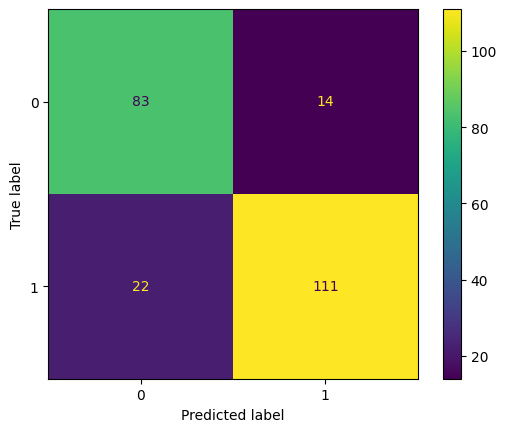

In [32]:
print('\033[1m Confsuion Matrix for Support Vector Machines \033[0m')
cfx_svm = confusion_matrix(y_test, y_predsvm)
ConfusionMatrixDisplay(cfx_svm).plot()

## Decision Tree Classifier

 Confsuion Matrix for Decision Tree Classifier 


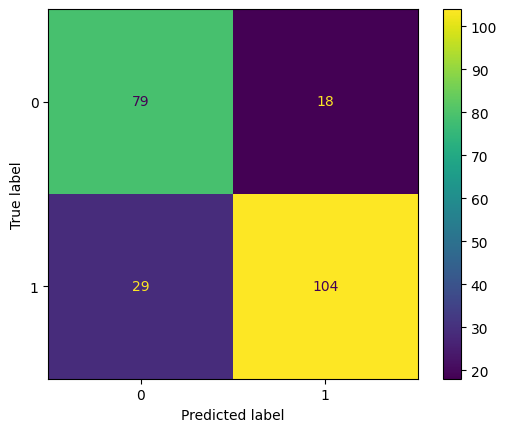

In [33]:
print('\033[1m Confsuion Matrix for Decision Tree Classifier \033[0m')
cfx_tree = confusion_matrix(y_test, y_predtree)
ConfusionMatrixDisplay(cfx_tree).plot()

## K Nearest Neighbors

 Confsuion Matrix for K Nearest Neighbors 


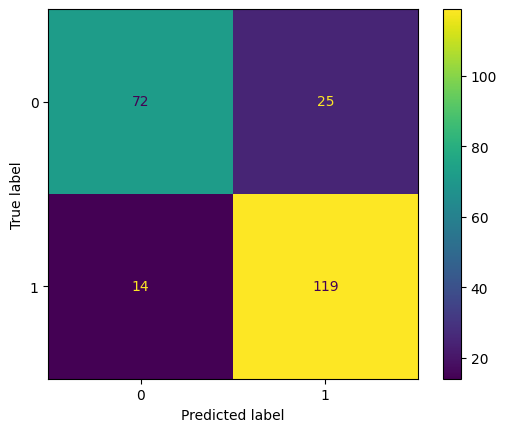

In [34]:
print('\033[1m Confsuion Matrix for K Nearest Neighbors \033[0m')
cfx_knn = confusion_matrix(y_test, y_predknn)
ConfusionMatrixDisplay(cfx_knn).plot()

# Metrics Evaluation

Now that all the models are trained and tested, let's merge all the scores into a single pandas table. This will make it easier for us to analyse the results and comeup with a reason as to which model is better.

In [35]:
score = pd.concat([s_svm, s_tree, s_knn], axis=1, ignore_index=True)
score

,0,1,2
Model,Support Vector Machines,Decision Tree,K Nearest Neighbors
F1 Score,0.860465,0.815686,0.859206
Accuracy,0.843478,0.795652,0.830435
Precision,0.888,0.852459,0.826389
Recall,0.834586,0.781955,0.894737


# Analysis

Looking at the result table above, we can see that ***Support Vector Machines(SVM)*** perform the best having the highest numbers for ***F1-score, Accuracy, Precision and Recall***. One thing interesting to notice here is that, the other two methods are also not very far behind, in terms of performance, from SVM. There results are only off by +/-5%, which means that the other modelscan also be used to make accurate predictions of this type of dataset, but SVM is the best amongst the three, namely,***Support Vector Machines, Decision Tree Classifier & K Nearest Neighbors.***

# References

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Assessment Submission Form

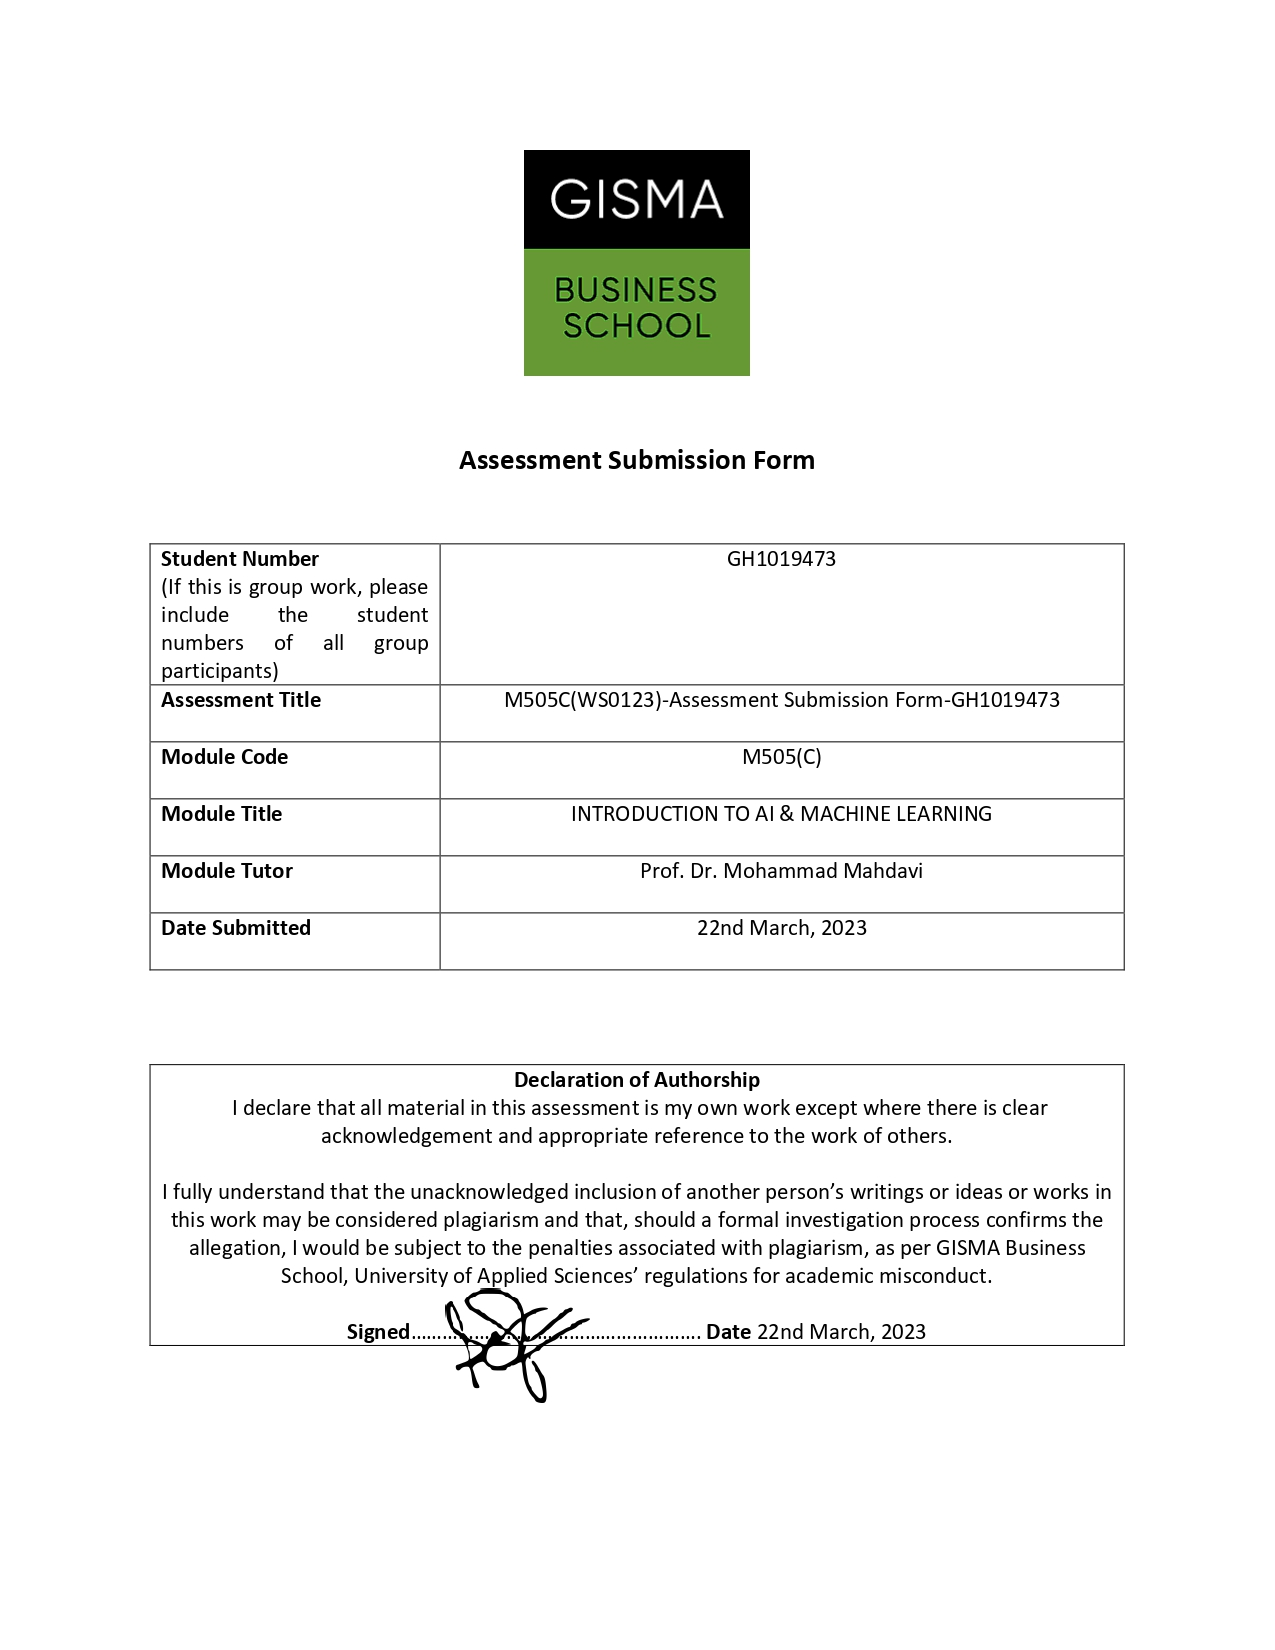